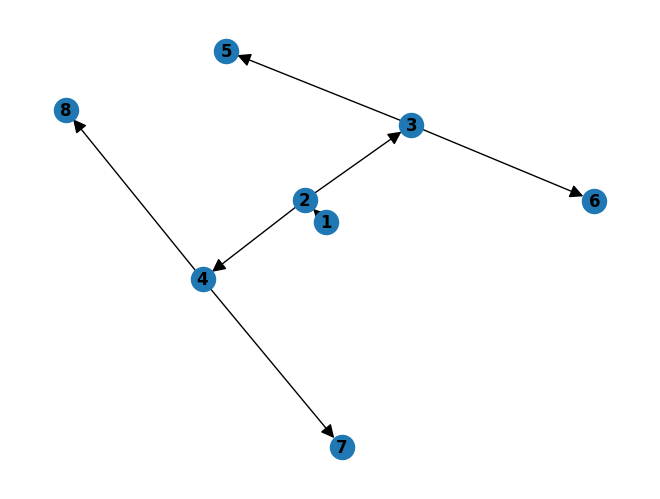

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed acyclic graph (DAG)
acyclic_graph = nx.DiGraph()
acyclic_graph.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8)])
acyclic_graph_dict = {node: list(acyclic_graph.successors(node)) for node in acyclic_graph.nodes}

# Visualize the acyclic graph (optional)
nx.draw(acyclic_graph, with_labels=True, font_weight='bold', arrowsize=20)
plt.show()

In [2]:
def topological_sort(graph):
    # Helper function for recursive depth-first search
    def dfs(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor)
        topological_order.insert(0, node)

    visited = set()
    topological_order = []

    # Perform depth-first search for each unvisited node
    for node in graph:
        if node not in visited:
            dfs(node)

    return topological_order

def layer_assignment(acyclic_graph):
#The layer of a node is determined by considering the maximum layer of its incoming neighbors and incrementing it.
    topological_order = topological_sort(acyclic_graph)
    layers = {node: 0 for node in acyclic_graph}  # Initialize all nodes to Layer 0
    
    for node in topological_order:
        in_neighbors = [neighbor for neighbor, successors in acyclic_graph.items() if node in successors]
        layer = max([layers[neighbor] for neighbor in in_neighbors], default=-1) + 1
        layers[node] = layer

    return layers

def y_coordinate_assignment(layers):
#assigns y-coordinates to nodes based on their layers. It sorts the nodes by layer and assigns y-coordinates in increasing order.
    sorted_nodes = sorted(layers.keys(), key=lambda node: layers[node])
    y_coordinates = {node: layer for layer, node in enumerate(sorted_nodes)}
    return y_coordinates


In [3]:
def height_optimization(graph):
    layers = []  # List to store layers
    i = 1

    while graph:
        sources = [node for node in graph if not any(node in successors for successors in graph.values())]
        layers.append(sources)
        i += 1
        graph = {node: successors for node, successors in graph.items() if node not in sources}

    return layers

def y_coordinate_assignment_with_height_optimization(graph):
    height_optimization_layers = height_optimization(graph)

    # Flatten the layers obtained from height optimization
    flat_layers = [node for layer in height_optimization_layers for node in layer]

    # Assign y-coordinates based on the flattened layers
    y_coordinates = {node: index for index, node in enumerate(flat_layers)}

    return y_coordinates

In [4]:
# Perform layer assignment
layers = layer_assignment(acyclic_graph_dict)

# Perform y-coordinate assignment based on layers
y_coordinates = y_coordinate_assignment(layers)

# Perform y-coordinate assignment based on height optimization
#y_coordinates_with_height_optimization = y_coordinate_assignment(acyclic_graph)

# Print the layer assignment and y-coordinate assignment
for node, layer in layers.items():
    print(f"Node {node}: Layer {layer}, y-coordinate = {y_coordinates[node]}")

#for node, y_coordinate in y_coordinates_with_height_optimization.items():
#    print(f"Node {node}: y-coordinate = {y_coordinate}")

Node 1: Layer 0, y-coordinate = 0
Node 2: Layer 1, y-coordinate = 1
Node 3: Layer 2, y-coordinate = 2
Node 4: Layer 2, y-coordinate = 3
Node 5: Layer 3, y-coordinate = 4
Node 6: Layer 3, y-coordinate = 5
Node 7: Layer 3, y-coordinate = 6
Node 8: Layer 3, y-coordinate = 7
